# Selection test Connecthink

Welcome to the practical selection test for the Data Scientist position at Connectthink. This test is designed to evaluate your skills and knowledge in data analysis, Python programming, use of specific libraries such as pandas, numpy, and your ability to interpret and solve practical data problems.

Please read each section carefully and follow the instructions provided to complete the exercises. The quality of your code, the efficiency of your solutions, and the clarity of your analyzes will be considered in the evaluation. Creativity when answering the questions will also be highly valued. **It is important to us that you go beyond what the numbers and graphs tell you.**
Write the conclusions and results you draw after each part.

Notes:
- You can use ChatGPT or similar to search for documentation, but **never** copy code directly generated by the model to the notebook.
- Add comments in code to express your reasoning process.

Good luck!

## Part 1: Load and initial visualization of the Data

1.1 To get started, load the 'Iris' dataset available in the seaborn library and display the first few rows of the DataFrame to familiarize yourself with the data.

Extra: Use another method other than .head() to see the characteristics of the dataframe.

In [1]:
# Libraries

import pandas as pd
import numpy as np
import seaborn as sns
from ydata_profiling import ProfileReport
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
%matplotlib inline

**- Load the IRIS dataset from Seaborn**

In [2]:
iris = sns.load_dataset('iris')

The Iris dataset is a classic in machine learning, featuring 150 samples from three species of Iris flowers (setosa, virginica, versicolor), each described by four features: sepal length, sepal width, petal length, and petal width. It's widely used for testing classification algorithms.

**- Information of the dataset**

In [3]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


The name of the variables are: sepal_length, sepal_width, sepal_width, petal_width and species. Each variable has 150 records without missings / nans, and all of them are float type variable, except 'species' that is a categorical variable (object).

**- Characteristics of the dataframe**

In [4]:
iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


Here we can see for every variable, the count of the records, the means, the standard deviation, minimum value, quartils and maximum values.

**- First few rows (not head)**

In [5]:
iris.iloc[:10]

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa
6,4.6,3.4,1.4,0.3,setosa
7,5.0,3.4,1.5,0.2,setosa
8,4.4,2.9,1.4,0.2,setosa
9,4.9,3.1,1.5,0.1,setosa


We can see the first 10 rows with a method other than head.

**- Single Report to see from the dataframe: Overview, variables information and characteristics, interactions, correlations, missing values, sample and duplicate rows**

Pandas Profiling is a Python library that offers an efficient way to perform initial exploratory analysis on a dataset. It automatically generates a detailed report highlighting key insights and patterns in the data, facilitating a deeper understanding of its structure and content without manual intervention.

In [6]:
# Create the yData profile report
profile = ProfileReport(iris, title="Pandas Profiling Report", explorative=True)

# To display the report in a Jupyter notebook
profile.to_widgets()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render widgets:   0%|          | 0/1 [00:00<?, ?it/s]

In [23]:
profile.to_notebook_iframe()

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

1.2 Randomly select 5 records and assign their "sepal_length" column the null value (nan, null, None..)

PS: Later you will understand the reason for this modification.

In [7]:
# Randomly select 5 records and assign their "sepal_length" column the null value

np.random.seed(11)

nan_indices = np.random.choice(iris.index, 5, replace=False)

iris_nans = iris.copy()

iris_nans.loc[nan_indices, 'sepal_length'] = np.nan

iris_nans.loc[nan_indices]

,sepal_length,sepal_width,petal_length,petal_width,species
112,NaN,3.0,5.5,2.1,virginica
145,NaN,3.0,5.2,2.3,virginica
133,NaN,2.8,5.1,1.5,virginica
56,NaN,3.3,4.7,1.6,versicolor
111,NaN,2.7,5.3,1.9,virginica


I have used the random module to randomly select 5 records and replace the value in the 'sepal_legth' column with a nan value. Then I show the rows where this subtitution has taken place and to see that it has been done correctly.

**- Characteristics of the dataframe AFTER MODIFICATION**

In [8]:
iris_nans.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,145.000000,150.000000,150.000000,150.000000
mean,5.820690,3.057333,3.758000,1.199333
std,0.832157,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.700000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


Initially, the mean 'sepal_length' was approximately 5.843 cm. After the five nans in sepal length, the new mean slightly changed, indicating that we've successfully injected missings / nans into our dataset without significantly altering its overall statistics.

**- Data information of the dataframe AFTER MODIFICATION**

In [9]:
iris_nans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  145 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


Now we can see that the variable 'sepal_length' no longer has 150 non-nans variables like the others, as we have substituted 5 values for nans.

## Part 2: Basic Exploratory Analysis
Performs a basic exploratory analysis of the 'Iris' data set. Includes:

- A statistical summary of each characteristic.
- Identification of missing values of each characteristic.
- Visualization of the distribution of each characteristic in relation to the species. You can use pairplots, histograms, box plots, etc.
- Write your conclusions based on the statistics and graphs you have obtained.

**- Statistical Summary of each characteristic (same)**

In [10]:
iris_nans.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,145.000000,150.000000,150.000000,150.000000
mean,5.820690,3.057333,3.758000,1.199333
std,0.832157,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.700000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


As we have seen before, some statistics such as mean or standard deviation change slightly due to the introduction of the nans in the sepal_length column.

**- Missing Values of each characteristic (same)**

In [11]:
iris_nans.isna().sum()

sepal_length    5
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

As we've seen before, we now have 5 missing values for 'sepal_length' column.

**- Visualization of the distribution of each characteristic in relation to the species**

<Figure size 1200x800 with 0 Axes>

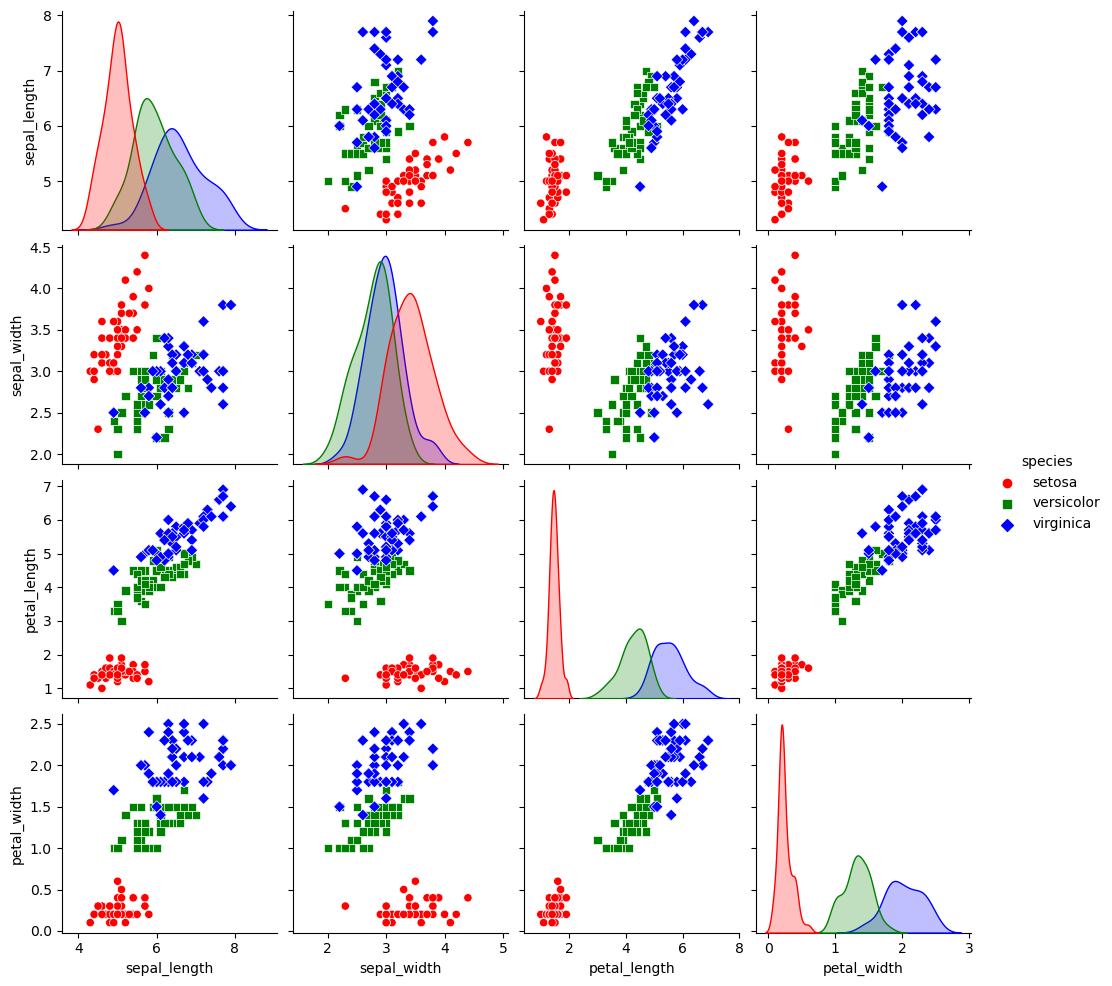

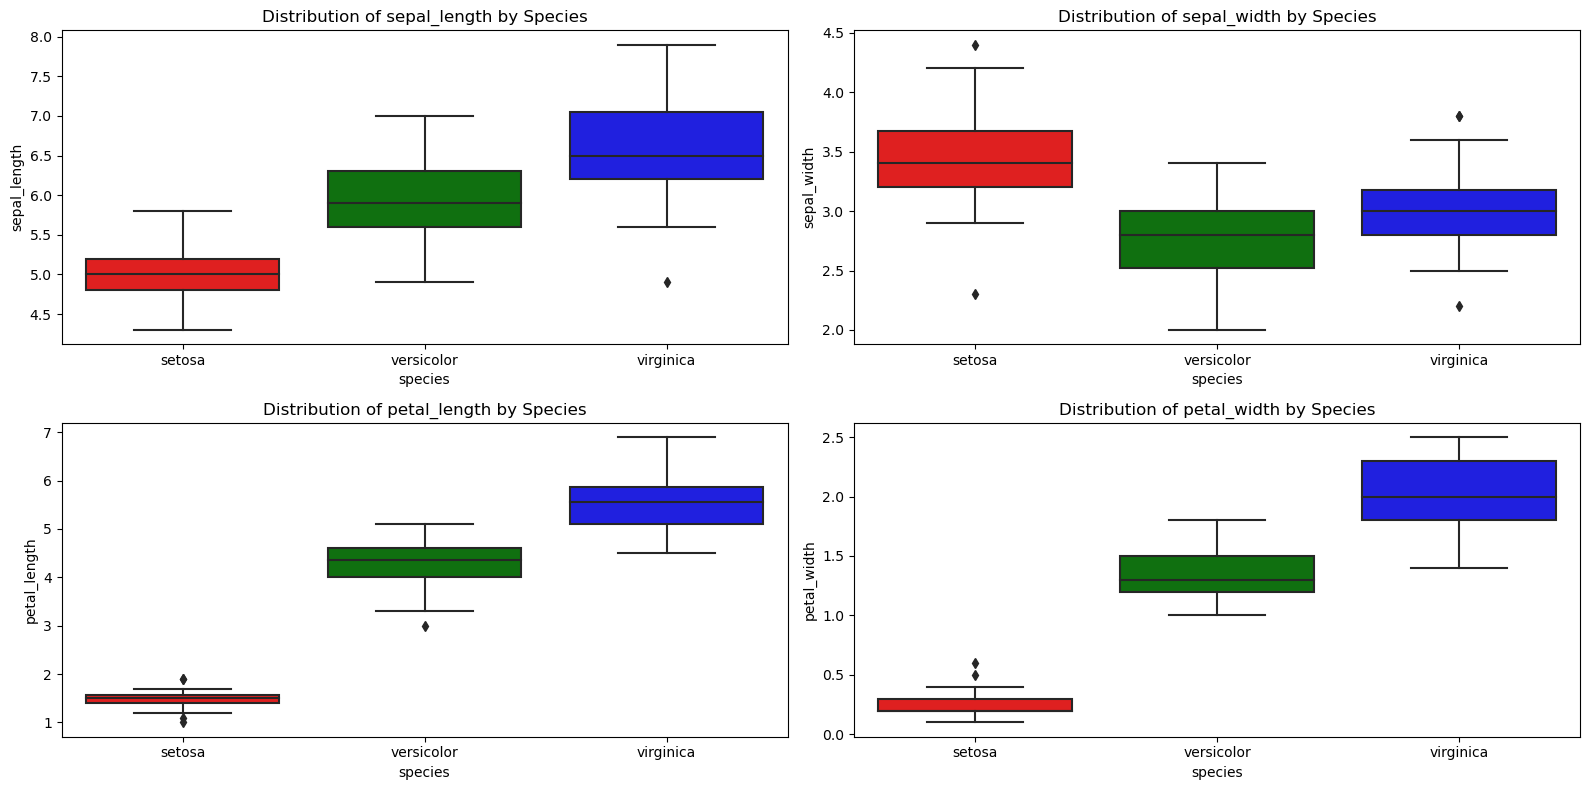

In [12]:
# Setting up the figure for multiple plots
plt.figure(figsize=(12, 8))

palette = {"setosa": "red", "versicolor": "green", "virginica": "blue"}

# Pairplot to show the distribution of each characteristic by species
pairplot = sns.pairplot(iris_nans, hue="species", markers=["o", "s", "D"], palette=palette)
plt.show()

# Boxplot for each feature to identify outliers and distribution
plt.figure(figsize=(16, 8))
for i, column in enumerate(iris_nans.columns[:-1], start=1):  # Skip the last column (species)
    plt.subplot(2, 2, i)
    sns.boxplot(x='species', y=column, data=iris_nans, palette=palette)
    plt.title(f'Distribution of {column} by Species')


plt.tight_layout()
plt.show()

**Pairplots:**
- Species Distinction: Setosa is very distinguishable from Versicolor and Virginica based on petal length and width. So petal measurements are highly indicative of species.

- Feature Relationships: Positive correlation between  petal length and width for all species, indicating that one measurement increases, so does the other (less prononunced for speal length and width).

- Overlap Areas: While setosa is clearly separated, there is some overlap between Versicolor and Virginica, especially in sepal width and sepal length.

- Distribution Shapes: In the diagonal, there's the distribution of each feature by species. Setosa tends to have smaller petals but wider sepals than the other species. Versicolor and Virnigica have more overlap, with Virgnifica generally featuring larger petal and sepal sizes.

**Boxplots:**
- Sepal Length: Virginica has the highest median sepal length (despite not being much difference with versicolor specie), followed by Versicolor and Setosa the shortest. The IQR (difference between Quartil 1 and Quartil 3) in sepal length for Setosa is way smaller than the other species while in the versicolor and virginica are quite similar.

- Sepal Width: Setosa shows a wider sepal width, and its distribution shows more variability also. There are some outliers in Versicolor and Virginica, indicating some exceptionally wide or narrow sepals outisde the typical range of these species.

- Petal Length: Clear distinction in petal length among the species. Setosa has significantly shorter petals (all of the data of this variable is very compressed), and Virginica has the longest petals, which could be a critical feature for species identification.

- Petal Width: Similar to petal length, petal width sharply distinigues Setosa from other two species, with Virginica again showing the largest size. The boxplots for petal width are tightly grouped for Setosa, indicating less variablity compared to other species.

## Part 3: Outlier cleaning
Identify and clean outliers in the data set. You can use the interquartile range (IQR) method, perform a graphic analysis and eliminate the outliers "by eye" or any other method that occurs to you.

**- Function to remove outliers**

In [13]:
# Function to remove outliers based on the IQR method
def remove_outliers(df, feature, multiplier):
    Q1 = df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - multiplier * IQR
    upper_bound = Q3 + multiplier * IQR
    filtered_df = df[(df[feature] >= lower_bound) & (df[feature] <= upper_bound) | df[feature].isna()] # df[feature].isna() is to mantain NANS for Part 5
    return filtered_df

features = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
species = iris_nans['species'].unique()

# Apply the function to each feature in the dataset
cleaned_data = iris_nans.copy()
for feature in features:
    cleaned_data = remove_outliers(cleaned_data, feature, 0.95)

# Display how many entries were removed as outliers
original_len = len(iris_nans)
cleaned_len = len(cleaned_data)
removed_entries = original_len - cleaned_len

print("Original DataFrame size:", original_len)
print("Cleaned DataFrame size:", cleaned_len)
print("Outliers removed:", removed_entries)

Original DataFrame size: 150
Cleaned DataFrame size: 127
Outliers removed: 23


- We define a function called remove_outliers that takes the dataframe, feature and a multiplier as input.

- We calculate the quartiles (Q1 and Q3) and the interquartile range (IQR) for the given feature there.

- We set lower and upper bounds based on the IQR.

- We filter the dataframe to keep only the rows where the feature values are within the established bounds.

- Then we return the filtered DataFrame.

- Finall we print the size of the original dataframe and the size of the cleaned dataframe (without outliers), as well as the number of entries removed as outliers.

The decision to use a multiplier of 0.95 is because it was the best balance I found between not removing too many outliers and not removing only 2 or 3, so the IQR box bounds are fairly balanced.

**- Pairplots and boxplots as before, to see the difference after removing outliers**

<Figure size 1200x800 with 0 Axes>

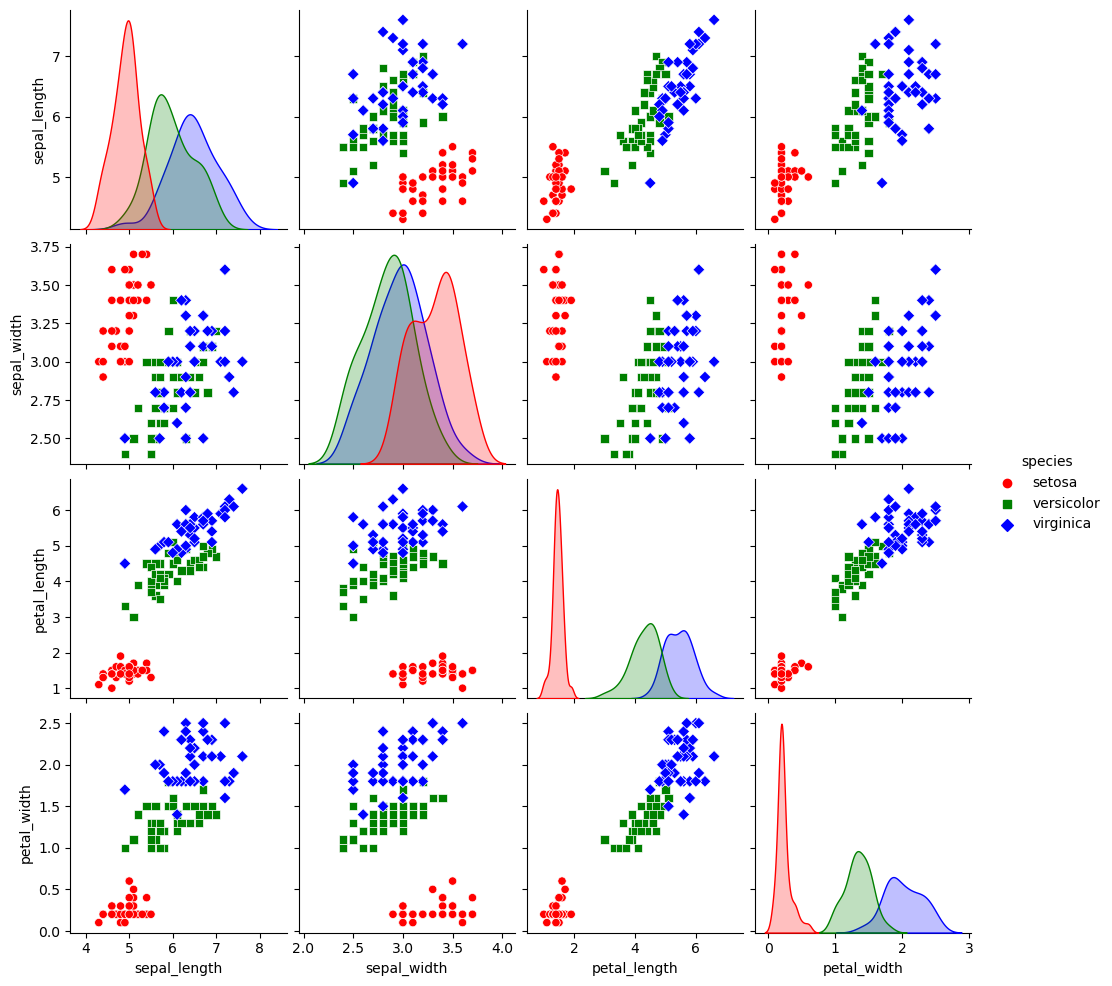

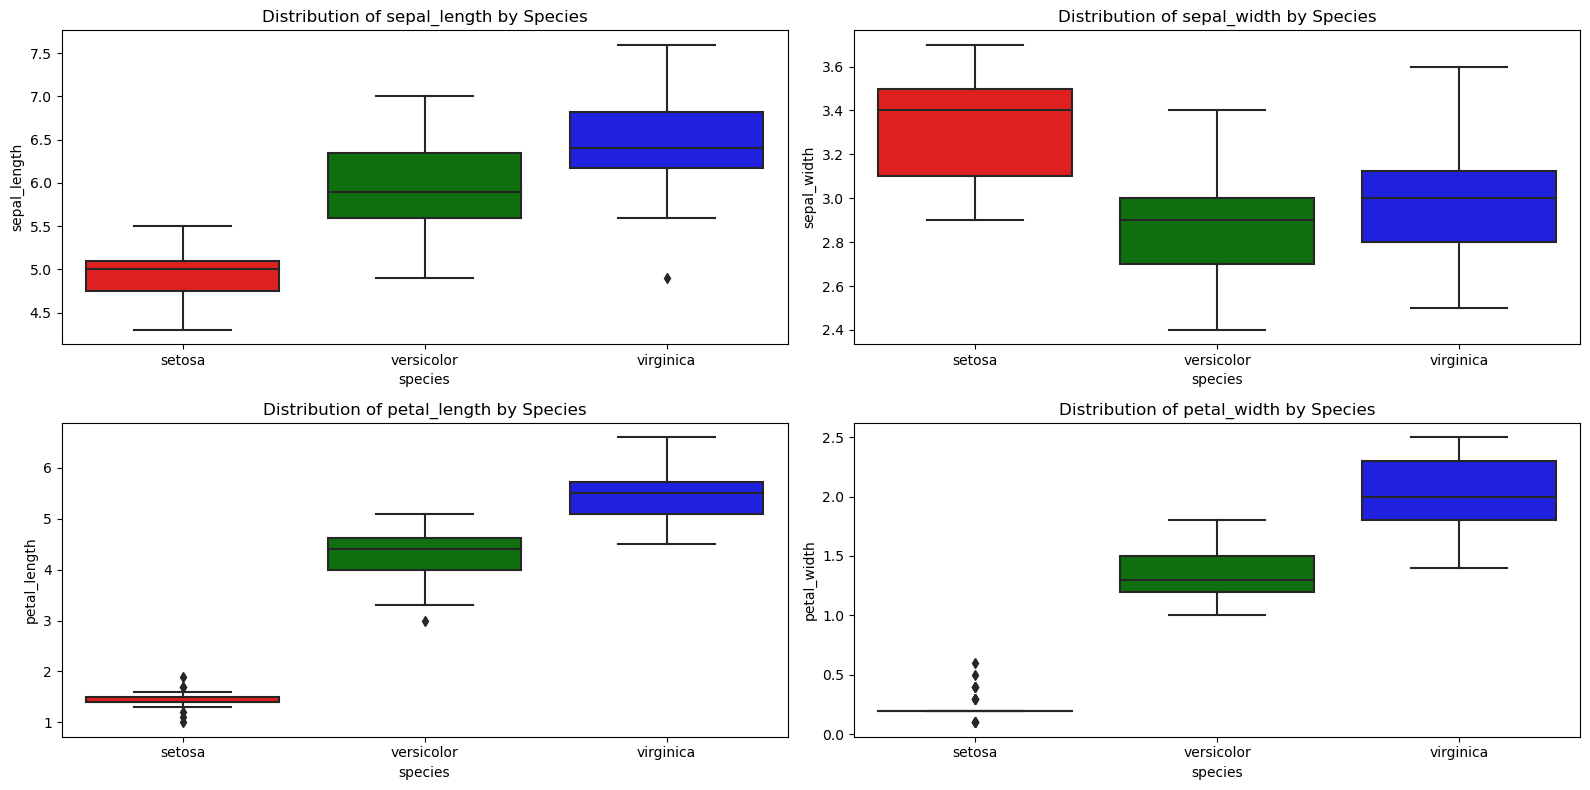

In [14]:
# Setting up the figure for multiple plots
plt.figure(figsize=(12, 8))

# Pairplot to show the distribution of each characteristic by species
pairplot = sns.pairplot(cleaned_data, hue="species", markers=["o", "s", "D"], palette=palette)
plt.show()

# Boxplot for each feature to identify outliers and distribution
plt.figure(figsize=(16, 8))
for i, column in enumerate(cleaned_data.columns[:-1], start=1):  # Skip the last column (species)
    plt.subplot(2, 2, i)
    sns.boxplot(x='species', y=column, data=cleaned_data, palette=palette)
    plt.title(f'Distribution of {column} by Species')


plt.tight_layout()
plt.show()

Now in a more visual way, to be able to compare with the previous graphs:

- In the scatter plots there is a reduction in extreme data points

- Distributions are tighter and less spread out

- There are fewer outliers shown in the boxplots

- The scales on several charts are slightly adjusted, reflexting the removal of outliers

## Part 4: Creating Aggregate Columns
Create a new columns in the DataFrame that can be useful for the predictive model that we will train in Part 5. For example, you could create a column that groups X feature into categories.

Note: Create a function to solve this exercise

**- Label encoding of 'Species'**

In [15]:
# Inicializar el LabelEncoder
le = LabelEncoder()

# Ajustar y transformar los valores de la columna 'species' para convertirlos a números
cleaned_data['species'] = le.fit_transform(cleaned_data['species'])

# Muestra las primeras filas para verificar los cambios
cleaned_data.tail()

,sepal_length,sepal_width,petal_length,petal_width,species
145,NaN,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2
149,5.9,3.0,5.1,1.8,2


For the iris dataset, the categories ('setosa', 'versicolor', 'virginica') have no order that affects the analysis (qualitative nominal variable) that is, it is not that one category is superior to another. So, Label Encoding is appropriate here because we simply need a numerical representation of the classes for next machine learning algorithms and matrix correlation.

SETOSA specie -> 0

VERISCOLOR specie -> 1

VIRGNICA specie -> 2

**- Matrix Correlation**

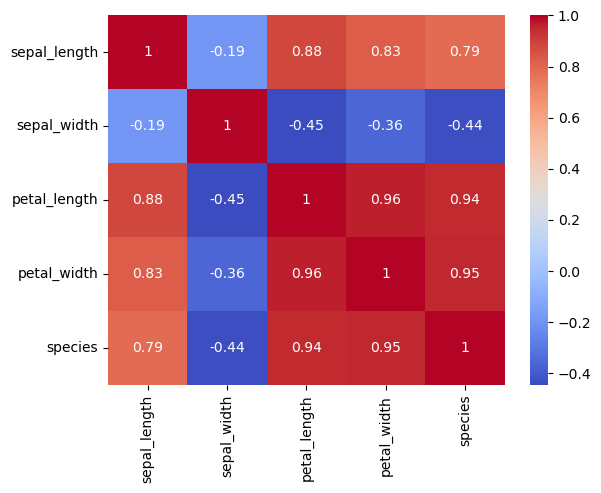

In [16]:
matriz_correlacion = cleaned_data.corr()

sns.heatmap(matriz_correlacion, annot=True, cmap='coolwarm')
plt.show()

It can be seen that our target variable sepal_length, is more correlated with the petal_length variable (it could also be seen in the past graphics). Therefore petal length may be the most interesting variable to categorise. 

**- Creation of new column**

In [17]:
def create_aggregate_column(df):
    # Define name of the categories
    # labels = ['Very Short', 'Short', 'Long', 'Very Long']
    labels = [0, 1, 2, 3]
    
    # Use pd.qcut to asign every 'Petal Length' a category based on quartils
    df['Category_Petal_Length'] = pd.qcut(df['petal_length'], q=4, labels=labels)
    
    # Return modified dataframe
    return df

create_aggregate_column(cleaned_data)
cleaned_data.head()

,sepal_length,sepal_width,petal_length,petal_width,species,Category_Petal_Length
0,5.1,3.5,1.4,0.2,0,0
1,4.9,3.0,1.4,0.2,0,0
2,4.7,3.2,1.3,0.2,0,0
3,4.6,3.1,1.5,0.2,0,0
4,5.0,3.6,1.4,0.2,0,0


In this function, pd.qcut splits the "Petal Length" column into four quartiles and assigns each a name / value based on its relative length. This new column will provide an intuitive way to group data by petal length, which could be very useful for predictive modelling.

## Part 5: Interpolation of missing values in 'sepal_length' using a predictive model

In Part 1.2, you modified the DataFrame to introduce null values in the `sepal_length` column. Now, the goal is to use a predictive model to estimate and replace these missing values. This approach can be more sophisticated than mean or median imputation and can provide more precise estimates based on the relationships between characteristics.

The code must contain the following:
  - Prepare test and train set (validation if necessary)
  - Predictive model creation
  - Model training
  - Missing values prediction
  - Replace null values with values obtained from the prediction

Use multiple model types and hyperparameter combinations to decide which model to use for interpolation. Choose the best model and explain why you think it is the best.

Note:
- Use comments to express your reasoning in each block of code

**- Separating the data**

In [18]:
# Separating rows with missing sepal_length and the rest of the data
data_missing = cleaned_data[cleaned_data['sepal_length'].isna()].copy()
data_complete = cleaned_data.dropna()

# Preparing features (X) and target (y)
X_complete = data_complete.drop(['sepal_length'], axis=1)
y_complete = data_complete['sepal_length']


We separate rows with missing sepal_length values to form our "to predict" set, and the rest will form the training and validation sets.

**- Train-Test Split**

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X_complete, y_complete, test_size=0.2, random_state=42)

We split the data into training and testing sets to evaluate the performance of our models.

**- Model Selection and Hyperparameter Tuning**

In [20]:
def evaluate_models(X_train, y_train, X_test, y_test):
    
    # Chosen Regression models with their possible parameters
    models = {
        'LinearRegression': {
            'model': LinearRegression(),
            'params': {}
        },
        'RandomForestRegressor': {
            'model': RandomForestRegressor(),
            'params': {
                'n_estimators': [10, 50, 100],
                'max_depth': [None, 10, 20]
            }
        },
        'SVR': {
            'model': SVR(),
            'params': {
                'C': [0.1, 1, 10],
                'kernel': ['linear', 'rbf']
            }
        },
        'GradientBoostingRegressor': {
            'model': GradientBoostingRegressor(),
            'params': {
                'n_estimators': [50, 100, 200],
                'learning_rate': [0.05, 0.1, 0.2],
                'max_depth': [3, 4, 5]
            }
        }
    }
    
    # Iterate over all models
    for name, model in models.items():
        # Create a pipeline that first normalises data and then takes the best parameters
        pipe = Pipeline([
            ('scaler', StandardScaler()),
            ('model', GridSearchCV(model['model'], model['params'], cv=5, return_train_score=False))
        ])
        
        pipe.fit(X_train, y_train) # pipeline training 
        best_params = pipe.named_steps['model'].best_params_ # extraction of best parameters
        predictions = pipe.predict(X_test) # prediction with trained pipeline
        rmse = np.sqrt(mean_squared_error(y_test, predictions)) # RMSE
        
        print(f"{name}: RMSE = {rmse}, Best Params = {best_params}")
        
# Evaluate models
evaluate_models(X_train, y_train, X_test, y_test)

LinearRegression: RMSE = 0.23732739327597782, Best Params = {}
RandomForestRegressor: RMSE = 0.26671701898770306, Best Params = {'max_depth': 20, 'n_estimators': 100}
SVR: RMSE = 0.2605116660853012, Best Params = {'C': 1, 'kernel': 'linear'}
GradientBoostingRegressor: RMSE = 0.2859580294106172, Best Params = {'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 50}


We define a function to evaluate multiple models: Linear Regression, Random Forest, SVR and Gradient Boosting (chose these models because they are known to be best supervised models to give good results in these type of regression problems for predicting continuous variables) 

We can see their hyperparameters using GridSearchCV. Then return each model with its RMSE (chose this one to have same units and facilitate understanding) and best parameters in order to choose the one to use for prediction.

**- Predicting and Replacing Missing Values**

In [21]:
# LinearRegression performed best
best_model = Pipeline([
    ('scaler', StandardScaler()),
    ('model', LinearRegression())
])
best_model.fit(X_complete, y_complete)

# Predict missing values
data_missing['sepal_length'] = best_model.predict(data_missing.drop(['sepal_length'], axis=1))

# Combine back with the original dataset
data_imputed = pd.concat([data_complete, data_missing])


After selecting the best model based on the Root Mean Squared Error (RMSE), in this case Linear Regression (showing this is a simple problem), we proceed to predict the missing sepal_length values and replace them in the original dataset.

**- Comparison of 5 values after Nan imputation and before prediction**

In [22]:
# Assuming `indices_of_nans` holds the indices of the NaN values introduced
indices_of_nans = nan_indices

# Extract original sepal_length values for the given indices
original_sepal_length_values = iris.loc[indices_of_nans, 'sepal_length'].values

# Extract predicted sepal_length values from the imputed dataset
predicted_sepal_length_values = data_imputed.loc[indices_of_nans, 'sepal_length'].values

# Create a DataFrame for comparison
comparison_df = pd.DataFrame({
    'Original Sepal Length': original_sepal_length_values,
    'Predicted Sepal Length': predicted_sepal_length_values,
    'Difference': np.abs(original_sepal_length_values - predicted_sepal_length_values)
}, index=indices_of_nans)

comparison_df['Difference'] = comparison_df['Difference'].round(2)

print(comparison_df)

     Original Sepal Length  Predicted Sepal Length  Difference
112                    6.8                6.528309        0.27
145                    6.7                6.238512        0.46
133                    6.3                6.240106        0.06
56                     6.3                6.524783        0.22
111                    6.4                6.289160        0.11


With this we can see the difference between the value that was in the sepal_length records before imputing the nans, compared to the values after the prediction, along with their difference. We can see that although they are not exact, the predicted values are very close to the real ones.